# Homework 3
Noam Yan

## Problem 1

1a) Since the confusion matrix is provided. It is esay to get the accuracy. NN makes 8 mistakes and NA makes 12 mistakes, so NN makes fewer mistakes.<br>
1b) Considering the preference of accuracy of birds, we tend to use NA to maximize the recall regardless of the precision. <br>
1c) To reproduce the truth table with new input,we can assume the threshold does not change, so the recall of birds and recall of people remain the same.I also tried to use precision, but it leads to negative result, which makes no sense.<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# 
NN_cm = [45,5,3,47]
NA_cm = [47,11,1,42]

In [3]:
def makeNewTable(cm, people, birds,algorithm, round=False):
    [tp,fp,fn,tn] = [i for i in cm]
    bird_recall = tp/(tp+fn)
    person_recall = tn/(tn+fp)
    
    new_tp = bird_recall*birds
    new_tn = person_recall*people
    new_fn = birds-new_tp
    new_fp = people-new_tn

    if round:
        [new_tp,new_fn,new_fp,new_tn] = np.round([new_tp,new_fn,new_fp,new_tn])
        df = pd.DataFrame({"True Bird": [new_tp,new_fn],"True Person":[new_fp,new_tn]},index=['%s Bird'%algorithm,'%s Person'%algorithm],dtype='int8')
    else: df = pd.DataFrame({"True Bird": [new_tp,new_fn],"True Person":[new_fp,new_tn]},index=['%s Bird'%algorithm,'%s Person'%algorithm])
    return df

In [4]:
people = 100*.01
birds = 100-people
NN_df = makeNewTable(NN_cm,people,birds,"NN")
NN_df_rounded = makeNewTable(NN_cm,people,birds,"NN",True)
NA_df = makeNewTable(NA_cm,people,birds,"NA")
NA_df_rounded = makeNewTable(NA_cm,people,birds,"NA",True)
print("New Truth Tables are shown below: \n    If we want to keep the float")
print(NN_df)
print()
print(NA_df)
print("----------------------------------")
print("    If we want to round to integer")
print(NN_df_rounded)
print()
print(NA_df_rounded)

New Truth Tables are shown below: 
    If we want to keep the float
           True Bird  True Person
NN Bird      92.8125     0.096154
NN Person     6.1875     0.903846

           True Bird  True Person
NA Bird      96.9375     0.207547
NA Person     2.0625     0.792453
----------------------------------
    If we want to round to integer
           True Bird  True Person
NN Bird           93            0
NN Person          6            1

           True Bird  True Person
NA Bird           97            0
NA Person          2            1


## Problem 2
2a)

In [5]:
def _conv (xrange, sumOrAvg, pdf, times):
    '''
    sumOrAvg:  0 means sum, 1 means Avg.
    times: can be a list or an integer.
    '''
    conv_pdf = pdf
    if type(times) is int:
        for i in range(times-1):
            conv_pdf = np.convolve(conv_pdf,pdf)
        conv_xrange = np.linspace(xrange[0]*times,xrange[-1]*times, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
        return conv_xrange, conv_pdf                                                                                                               
    else:
        ans_dist = {"conv_xrange":[], "conv_pdf":[]}                                                                                                               
        for i in times:
            for j in range(i-1):
                conv_pdf = np.convolve(conv_pdf,pdf)
            conv_xrange = np.linspace(xrange[0]*i,xrange[-1]*i, conv_pdf.shape[0]) if sumOrAvg==0 else np.linspace(xrange[0],xrange[-1], conv_pdf.shape[0])
            ans_dist['conv_xrange'].append(conv_xrange)
            ans_dist['conv_pdf'].append(conv_pdf)
        return ans_dist['conv_xrange'], ans_dist['conv_pdf']

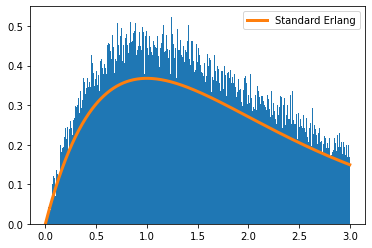

In [6]:
X_rvs = stats.expon.rvs(size=100000)
Y_rvs = stats.expon.rvs(size=100000)
xrange = np.linspace(0,3,1000)
erlang_pdf = stats.erlang.pdf(xrange,a=2)
sum_rvs = X_rvs + Y_rvs
fig,ax = plt.subplots(1,1)
ax.hist(sum_rvs,bins=500,range=(0,3),density=True)
ax.plot(xrange,erlang_pdf, label="Standard Erlang",linewidth =3)
ax.legend()
plt.show()

This is an Erlang Distribution.<br> 
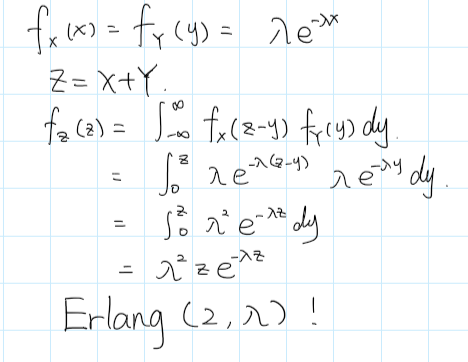
2b)

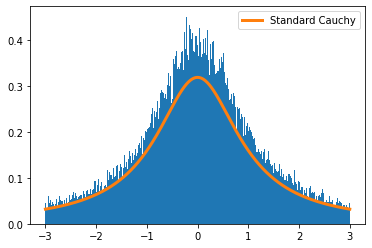

In [7]:
X_rvs = stats.norm.rvs(size=100000)
Y_rvs = stats.norm.rvs(size=100000)
xrange = np.linspace(-3,3,1000)
cauchy_pdf = stats.cauchy.pdf(xrange)
ratio = X_rvs/Y_rvs
fig,ax = plt.subplots(1,1)
ax.hist(ratio,bins=500,range=(-3,3),density=True)
ax.plot(xrange,cauchy_pdf, label="Standard Cauchy",linewidth =3)
ax.legend()
plt.show()

This is a Standard Cauchy Distribution.<br>
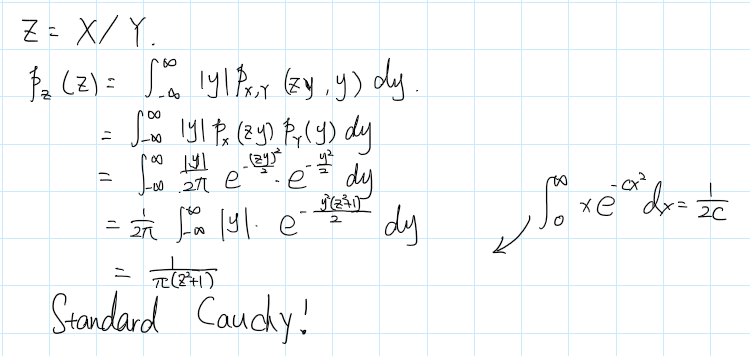
2c)

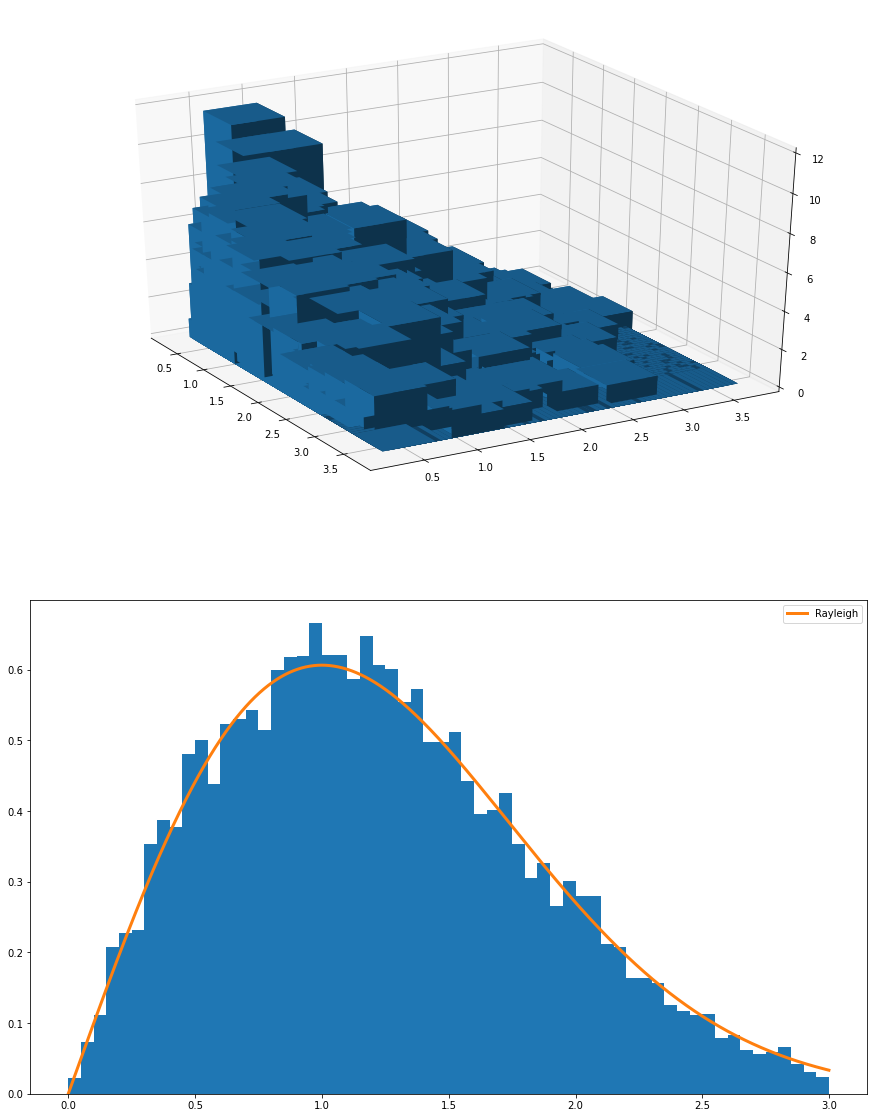

In [10]:
plt.rcParams["figure.figsize"] = (15,20)
fig = plt.figure()

ax = fig.add_subplot(2,1,1, projection='3d')
X = stats.norm.rvs(size=10000)
Y = stats.norm.rvs(size=10000)

hist, xedges, yedges = np.histogram2d(X, Y, bins=60, range=[[0, 3], [0, 3]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,)
ax.view_init(30, -30)

ax = fig.add_subplot(2,1,2)
xrange = np.arange(0,3,1e-3)
rayleigh_pdf = stats.rayleigh.pdf(xrange)
Z = np.sqrt(X**2+Y**2)
ax.hist(Z,bins=60,range=(0,3),density=True)
ax.plot(xrange,rayleigh_pdf,label="Rayleigh",linewidth=3)
ax.legend()

plt.show()

It is a Rayleigh distribution. Figure 1 shows in 2D-Plot and Figure 2 shows in 1D-Plot.
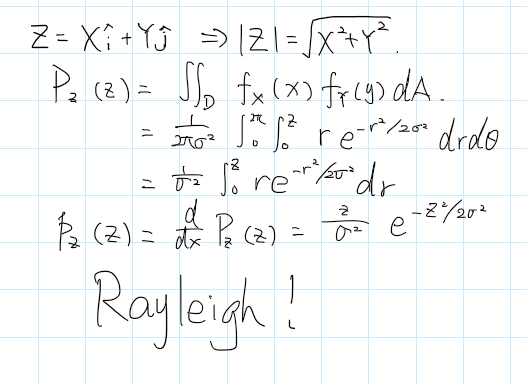